#BERNARDO

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
df = pd.read_csv('Spotify_Youtube.csv')
#oi = df[df['Artist'] == 'Justin Bieber']
#oi[['Track', 'Stream', 'Views']].sort_values(by='Views', ascending=False).head(10)

In [3]:
# Selecionando colunas importantes
df = df[['Artist', 'Album','Track', 'Stream', 'Views', 'official_video']]
# Excluindo músicas repetidas
df.drop_duplicates(subset=['Track', 'Album'], inplace=True)
# Criando coluna com a quantidade de streams + views
df['Total_views'] = df['Views'] + df['Stream']
# Excluindo valores nulos
df['Total_views'] = df['Total_views'].dropna()
df['Views'] = df['Views'].dropna()


In [4]:
# Excluindo músicas com menos de # milhões de views
df = df[df['Total_views'] > 1500e6]

In [5]:
# Vendo como esta a distribuição dos dados
filtro = df['official_video'] == True
print(df[filtro].shape)
print(df[~filtro].shape)

(404, 7)
(14, 7)


In [6]:
df[~filtro]


,Artist,Album,Track,Stream,Views,official_video,Total_views
124,Eminem,The Eminem Show,Till I Collapse,1.548872e+09,1.931315e+06,False,1.550803e+09
127,Eminem,Music To Be Murdered By,Godzilla (feat. Juice WRLD),1.072650e+09,5.470396e+08,False,1.619690e+09
1151,Luis Fonsi,VIDA,Despacito - Remix,1.593688e+09,2.761902e+07,False,1.621307e+09
1567,R.E.M.,Out Of Time (25th Anniversary Edition),Losing My Religion,9.709968e+08,1.050413e+09,False,2.021409e+09
8937,PSY,Gangnam Style (강남스타일),Gangnam Style (강남스타일),3.709911e+08,4.679767e+09,False,5.050759e+09
8939,PSY,Tik Tock Hits 2020,Gentleman,9.835475e+07,1.539136e+09,False,1.637491e+09
13009,J. Cole,2014 Forest Hills Drive,No Role Modelz,1.545710e+09,1.172414e+07,False,1.557435e+09
13019,J Balvin,OASIS,LA CANCIÓN,1.258594e+09,6.257677e+08,False,1.884362e+09
13503,Drake,Views,One Dance,2.522432e+09,1.692883e+08,False,2.691720e+09
14072,Justin Bieber,Purpose (Deluxe),Love Yourself,1.975867e+09,2.731750e+05,False,1.976140e+09


In [7]:
#Analisando as musicas com maior soma de streams + views
df[['Track','Total_views', 'official_video']].sort_values(by='Total_views',ascending=False).head(10)

,Track,Total_views,official_video
365,Despacito,9.586245e+09,True
12452,Shape of You,9.270404e+09,True
12469,See You Again (feat. Charlie Puth),7.295052e+09,True
10686,Uptown Funk (feat. Bruno Mars),6.474836e+09,True
12455,Thinking out Loud,5.701490e+09,True
12449,Perfect,5.673776e+09,True
13040,Counting Stars,5.526930e+09,True
14074,Sorry,5.368065e+09,True
9569,Sugar,5.320514e+09,True
12649,Let Her Go,5.161455e+09,True


In [8]:
#Analisando as musicas com maior soma de streams + views
df[['Track','Total_views', 'official_video']].sort_values(by='Total_views',ascending=True).head(10)

,Track,Total_views,official_video
4582,Total Eclipse of the Heart,1.502702e+09,True
19743,Ransom,1.505224e+09,False
351,Crazy In Love (feat. Jay-Z),1.505345e+09,True
17287,Mercy,1.505591e+09,True
13639,TiK ToK,1.507439e+09,True
18071,Finesse - Remix; feat. Cardi B,1.508740e+09,True
14034,Natural,1.509598e+09,True
10752,Sex on Fire,1.511814e+09,True
1549,The Sound of Silence,1.512165e+09,True
9577,Eres Mía,1.515433e+09,True


## Funcoes Auxiliares

In [9]:
def Intervalo_de_confianca(diffs):
  # deve retornar uma tupla com os valores criticos
  # exemplo: (critico_inferior, critico_superior)
  return (np.percentile(diffs,2.5), np.percentile(diffs,97.5))

In [10]:
def shuffling(data, col, log=False):
  ## Faz o teste de permutação
  if log:
    data[col] = [math.log(x) for x in data[col].values]
    
  N = 5000
  filtro = data['official_video'] == True

  t_obs = data[filtro][col].median() - data[~filtro][col].median()
  diffs = np.zeros(N)
  for i in range(N):
    np.random.seed(i)
    np.random.shuffle(filtro.values)
    diffs[i] = data[filtro][col].median() - data[~filtro][col].median()
  return diffs,t_obs

In [11]:
def p_value(t_obs, diffs):
  # deve retornar o p-valor ou seja,
  # a probabilidade de termos uma diferença maior que a estatística de teste
  return (diffs > t_obs).mean()

## Somando spotify + youtube

### Plotando os graficos

In [12]:
sem_clipe = df[df['official_video'] == False].dropna().Total_views.values
com_clipe = df[df['official_video'] == True].dropna().Total_views.values
data = [sem_clipe, com_clipe]

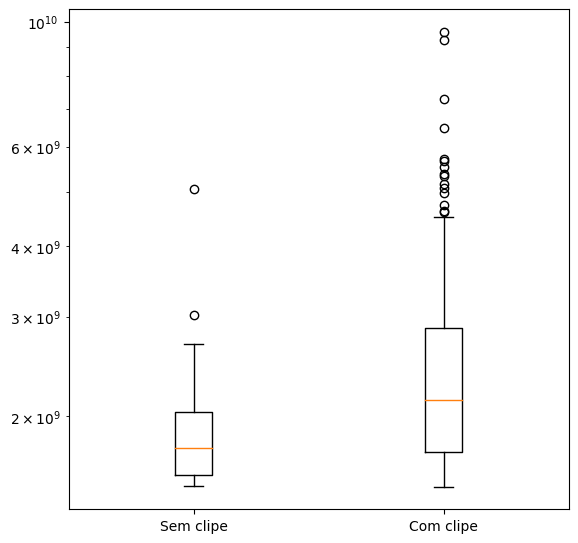

In [13]:
fig = plt.figure(figsize =(5, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
ax.set_yscale('log')
plt.xticks([1,2],['Sem clipe','Com clipe'])
plt.show()

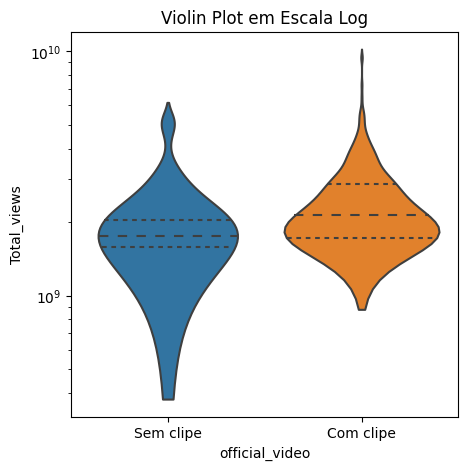

In [14]:
# Dados de exemplo (substitua pelo seu conjunto de dados)
fig, ax = plt.subplots(figsize=(5, 5))

ax = sns.violinplot(data = df,x="official_video", y="Total_views",split=True, inner="quart")

# Ajuste a escala logarítmica no eixo y
ax.set_yscale('log')

# Defina rótulos para os violinos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Sem clipe', 'Com clipe'])

# Adicione um título
ax.set_title('Violin Plot em Escala Log')

plt.show()


### Testando hipotese

H0 = Músicas com clipe e sem clipe possuem o mesmo tanto de visualizações + streams

In [15]:
aux = df
diffs, t_obs = shuffling(aux,'Total_views', log=True)

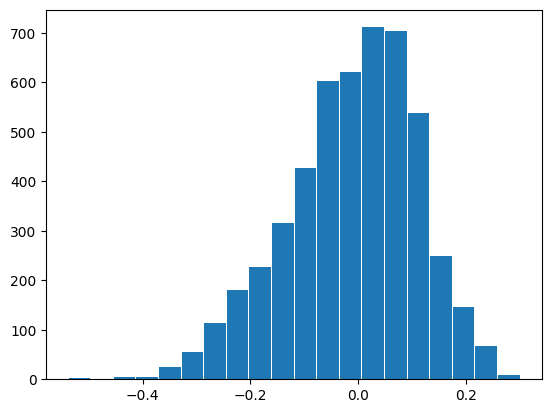

In [16]:
plt.hist(diffs, bins=20, rwidth=0.95);

In [17]:
print('Intervalo de confiança com 95%:', Intervalo_de_confianca(diffs))
print('Valor observado: ', t_obs)
print('p-valor:', p_value(t_obs, diffs))

Intervalo de confiança com 95%: (-0.2702624891255726, 0.19808950184532761)
Valor observado:  0.1977506830795619
p-valor: 0.0252


Como podemos observar, o valor observado esta fora do intervalo de confiança gerado pelo teste de permutação, logo rejeitamos a hipótese nula, o que significa que músicas com clipes tendem a ter mais visualizações no total(somando streams e views)

## Apenas spotify

### Plotando os graficos

In [18]:
sem_clipe = df[df['official_video'] == False].dropna().Stream.values
com_clipe = df[df['official_video'] == True].dropna().Stream.values
data = [sem_clipe, com_clipe]

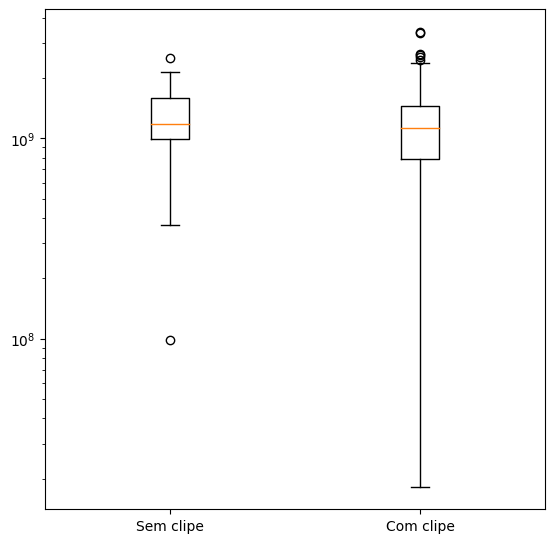

In [19]:
fig = plt.figure(figsize =(5, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
ax.set_yscale('log')
plt.xticks([1,2],['Sem clipe','Com clipe'])
plt.show()

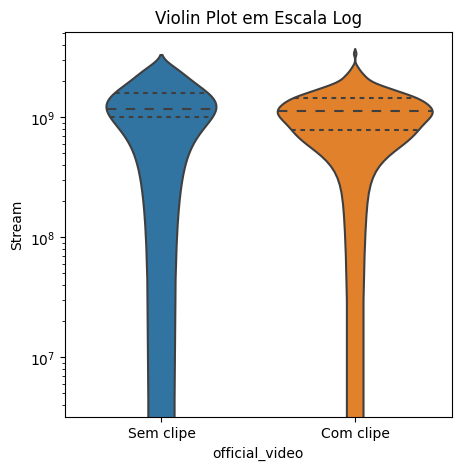

In [20]:
# Dados de exemplo (substitua pelo seu conjunto de dados)
fig, ax = plt.subplots(figsize=(5, 5))

ax = sns.violinplot(data = df,x="official_video", y="Stream",split=True, inner="quart")

# Ajuste a escala logarítmica no eixo y
ax.set_yscale('log')

# Defina rótulos para os violinos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Sem clipe', 'Com clipe'])

# Adicione um título
ax.set_title('Violin Plot em Escala Log')

plt.show()


### Testando hipotese

H0 = Músicas com clipe e sem clipe possuem o mesmo tanto de visualizações + streams

In [21]:
aux = df
diffs, t_obs = shuffling(aux,'Stream', log=True)

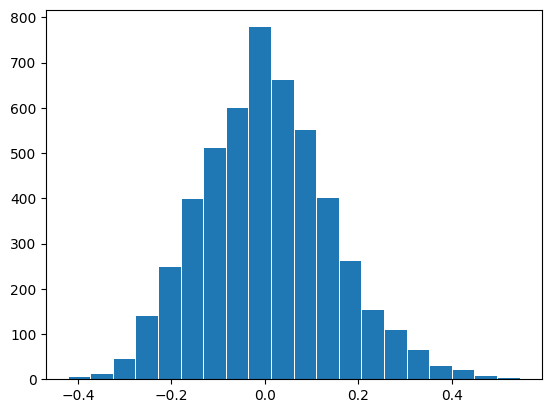

In [22]:
plt.hist(diffs, bins=20, rwidth=0.95);

In [23]:
print('Intervalo de confiança com 95%:', Intervalo_de_confianca(diffs))
print('Valor observado: ', t_obs)
print('p-valor:', p_value(t_obs, diffs))

Intervalo de confiança com 95%: (-0.2465988422950783, 0.3043485309186924)
Valor observado:  -0.044065023414312066
p-valor: 0.6312


In [24]:
print('Threshold \t Spotify+Youtube \t Spotify')
print('100e6 \t\t 0.0000 \t\t 0.1202')
print('200e6 \t\t 0.0000 \t\t 0.8974')
print('300e6 \t\t 0.0000 \t\t 0.9562')
print('400e6 \t\t 0.0000 \t\t 0.9984')
print('500e6 \t\t 0.0000 \t\t 0.9974')
print('1000e6 \t\t 0.0506 \t\t 0.9904')
print('1500e6 \t\t 0.0252 \t\t 0.6312')

Threshold 	 Spotify+Youtube 	 Spotify
100e6 		 0.0000 		 0.1202
200e6 		 0.0000 		 0.8974
300e6 		 0.0000 		 0.9562
400e6 		 0.0000 		 0.9984
500e6 		 0.0000 		 0.9974
1000e6 		 0.0506 		 0.9904
1500e6 		 0.0252 		 0.6312


Analisando esses resultados, podemos dizer que quando a música é um hit mundial (+ de 1,5M), se tratando apenas de spotify o fato dela não possuir clipe oficial não importa.
Quando consideramos musicas com mais de 200M de streams totais, se tratando apenas de spotify o fato dela não possuir clipe oficial não importa.
Usando o threshold entre 300 e 500 milhoes, rejeitamos a hipotese nula, ou seja, a presença de clipe faz a música ter mais visualizações tanto no spotify, quanto no youtube.

# irei aprontar